Ce test est dedié à l équipe de TicTacTrip qui implique une petite étude sur le transport public realisé grace aux données fournies.

### Chargement des librairies

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
import math

### Importation des Données

In [13]:
ticket = pd.read_csv('data/ticket_data.csv')
cities = pd.read_csv('data/cities.csv')
stations = pd.read_csv('data/stations.csv')
providers = pd.read_csv('data/providers.csv')

### Description des Données

In [14]:
print ("Lignes     : " ,ticket.shape[0])
print ("Colonnes  : " ,ticket.shape[1])
print ("\nFeatures : \n" ,ticket.columns.tolist())
print ("\nValeurs manquantes :  ", ticket.isnull().sum().values.sum())
print ("\nValeurs uniques :  \n",ticket.nunique())

Lignes     :  74168
Colonnes  :  12

Features : 
 ['id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations', 'other_companies', 'o_city', 'd_city']

Valeurs manquantes :   165764

Valeurs uniques :  
 id                 74168
company               20
o_station            438
d_station            454
departure_ts       12660
arrival_ts         12740
price_in_cents      1699
search_ts          13266
middle_stations     1207
other_companies       90
o_city               306
d_city               332
dtype: int64


In [15]:
print ("Lignes     : " ,cities.shape[0])
print ("Colonnes  : " ,cities.shape[1])
print ("\nFeatures : \n" ,cities.columns.tolist())
print ("\nValeurs manquantes :  ", cities.isnull().sum().values.sum())
print ("\nValeurs uniques :  \n",cities.nunique())

Lignes     :  8040
Colonnes  :  6

Features : 
 ['id', 'local_name', 'unique_name', 'latitude', 'longitude', 'population']

Valeurs manquantes :   7672

Valeurs uniques :  
 id             8040
local_name     8040
unique_name    8039
latitude       7168
longitude      7190
population      356
dtype: int64


In [16]:
print ("Lignes     : " ,stations.shape[0])
print ("Colonnes  : " ,stations.shape[1])
print ("\nFeatures : \n" ,stations.columns.tolist())
print ("\nValeurs manquantes :  ", stations.isnull().sum().values.sum())
print ("\nValeurs uniques :  \n",stations.nunique())

Lignes     :  11035
Colonnes  :  4

Features : 
 ['id', 'unique_name', 'latitude', 'longitude']

Valeurs manquantes :   0

Valeurs uniques :  
 id             11035
unique_name    11035
latitude       10426
longitude      10422
dtype: int64


In [17]:
print ("Lignes     : " ,providers.shape[0])
print ("Colonnes  : " ,providers.shape[1])
print ("\nFeatures : \n" ,providers.columns.tolist())
print ("\nValeurs manquantes :  ", providers.isnull().sum().values.sum())
print ("\nValeurs uniques :  \n",providers.nunique())

Lignes     :  227
Colonnes  :  10

Features : 
 ['id', 'company_id', 'provider_id', 'name', 'fullname', 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']

Valeurs manquantes :   26

Valeurs uniques :  
 id                      227
company_id               14
provider_id             213
name                    227
fullname                225
has_wifi                  2
has_plug                  2
has_adjustable_seats      2
has_bicycle               2
transport_type            4
dtype: int64


### Predéfinir les fonctions utiles

In [18]:
def toDate(date):
    heure = str(int(date[11:13])+int(date[20:]))
    return date[:11] + heure + date[13:19]

In [19]:
def duree(i):
    b = toDate(ticket.loc[i,"departure_ts"])
    a = toDate(ticket.loc[i,"arrival_ts"])
    start = datetime.datetime.strptime(a, '%Y-%m-%d %H:%M:%S')
    ends = datetime.datetime.strptime(b, '%Y-%m-%d %H:%M:%S')
    diff = relativedelta(start, ends)
    return ((( diff.days*24 + diff.hours)*60 + diff.minutes)*60 + diff.seconds)

Ajoutons la colonne durée

In [20]:
ticket["duration_in_seconds"] = pd.Series([duree(i) for i in range(len(ticket))])
ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration_in_seconds
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,22200
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,64200
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,115020
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,77700
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,78360


On peut commecer par analyser la distribution du prix 

count    74168.000000
mean      4382.711061
std       3739.325367
min        300.000000
25%       1900.000000
50%       3350.000000
75%       5250.000000
max      38550.000000
Name: price_in_cents, dtype: float64


c:\users\jileni\anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


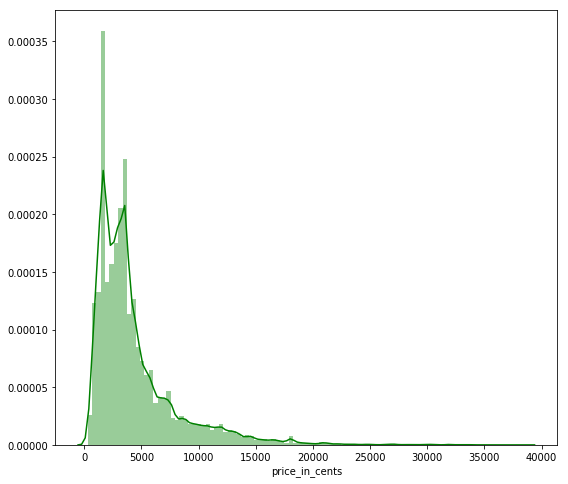

In [21]:
print(ticket['price_in_cents'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(ticket['price_in_cents'], color='g', bins=100, hist_kws={'alpha': 0.4});

D'après ce visuel on peut remarquer deux piques marquants prouvant que les prix les plus pertinants sont entre 3 et 5 euro

On s'interessera maintenant aux informations relatives au trajets

In [22]:
trajet=ticket.groupby(['o_city','d_city'])

Infos de prix par Trajet :

In [23]:
prix_trajet = pd.DataFrame({'prix_min': [], 'prix_max': [], 'prix_moy': []})

for (début, fin), t in trajet:

    prix_trajet = prix_trajet.append({
                               'prix_min': t["price_in_cents"].min()/100, 
                               'prix_max': t["price_in_cents"].max()/100, 
                               'prix_moy': t["price_in_cents"].mean()/100},
                                ignore_index=True)


In [24]:
prix_trajet

,prix_max,prix_min,prix_moy
0,220.0,186.0,203.200000
1,136.5,98.6,117.550000
2,89.2,20.0,40.426667
3,31.9,26.0,27.975000
4,24.2,7.0,8.646269
5,40.5,37.0,38.333333
6,52.9,50.9,51.900000
7,32.8,20.0,26.300000
8,107.4,23.9,64.052381
9,71.0,16.0,43.893939


Infos durée par trajet :

In [25]:
durée_trajet = pd.DataFrame({'durée_min': [], 'durée_max': [], 'durée_moy': []})

for (début, fin), t in trajet:

    durée_trajet = durée_trajet.append({
                               'durée_min': t["price_in_cents"].min()/100, 
                               'durée_max': t["price_in_cents"].max()/100, 
                               'durée_moy': t["price_in_cents"].mean()/100},
                                ignore_index=True)

In [27]:
durée_trajet

,durée_max,durée_min,durée_moy
0,220.0,186.0,203.200000
1,136.5,98.6,117.550000
2,89.2,20.0,40.426667
3,31.9,26.0,27.975000
4,24.2,7.0,8.646269
5,40.5,37.0,38.333333
6,52.9,50.9,51.900000
7,32.8,20.0,26.300000
8,107.4,23.9,64.052381
9,71.0,16.0,43.893939


Pour la suite, nous aurons besoin des informations de la table providers

In [28]:
data = ticket.merge(providers, left_on = "company", right_on = "id")

In [29]:
data.columns

Index(['id_x', 'company', 'o_station', 'd_station', 'departure_ts',
       'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations',
       'other_companies', 'o_city', 'd_city', 'duration_in_seconds', 'id_y',
       'company_id', 'provider_id', 'name', 'fullname', 'has_wifi', 'has_plug',
       'has_adjustable_seats', 'has_bicycle', 'transport_type'],
      dtype='object')

Différence de prix moyen selon les moyens de transport : 

In [30]:
moy_prix_transport = data[['price_in_cents','transport_type']].groupby('transport_type').mean()
moy_prix_transport.reset_index(inplace=True)
moy_prix_transport

,transport_type,price_in_cents
0,bus,3652.448036
1,carpooling,2742.171907
2,train,8506.634793


Voyons la comparaison de nos yeux

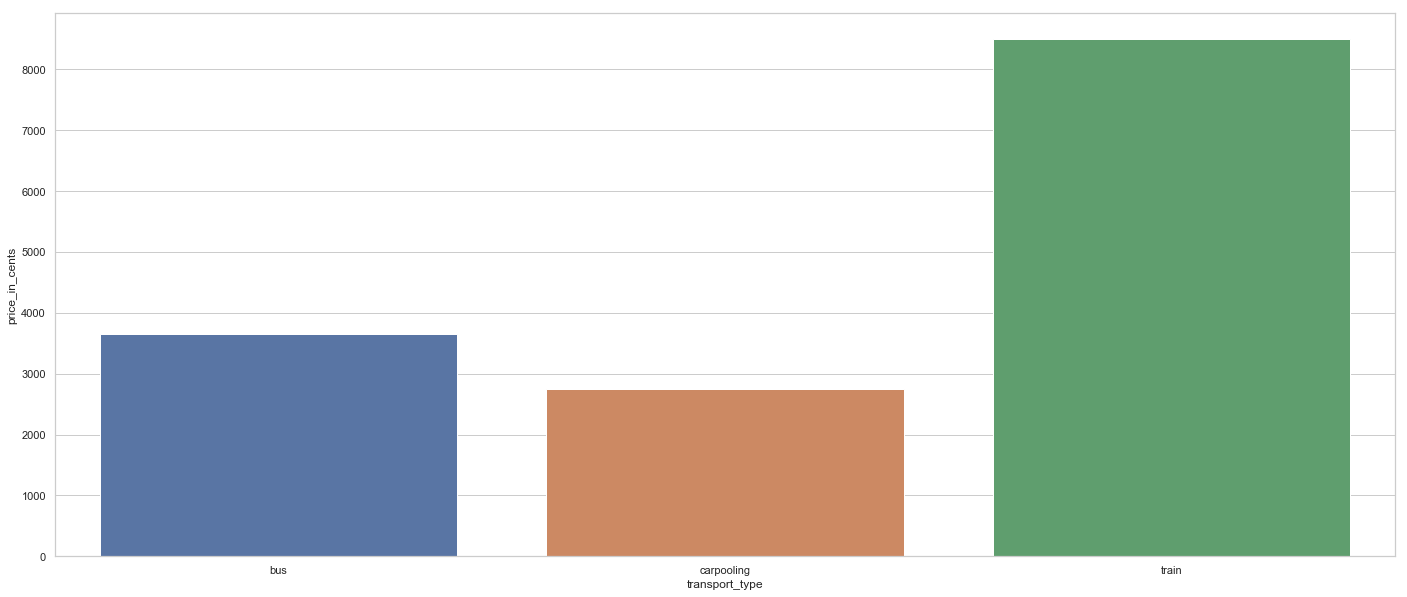

In [31]:
plt.figure(figsize=(24,10))
sns.set(style="whitegrid")
sns.barplot(x='transport_type', y='price_in_cents', data=moy_prix_transport)

D'après ce barplot on peut déduire que le train reste le plus cher parmi les deux autres moyens de transport

In [ ]:
Différence de durée moyenne selon les moyens de transport : 

In [32]:
moy_duree_transport = data[['duration_in_seconds','transport_type']].groupby('transport_type').mean()
moy_duree_transport.reset_index(inplace=True)
moy_duree_transport

,transport_type,duration_in_seconds
0,bus,56279.769532
1,carpooling,14798.330156
2,train,26403.435998


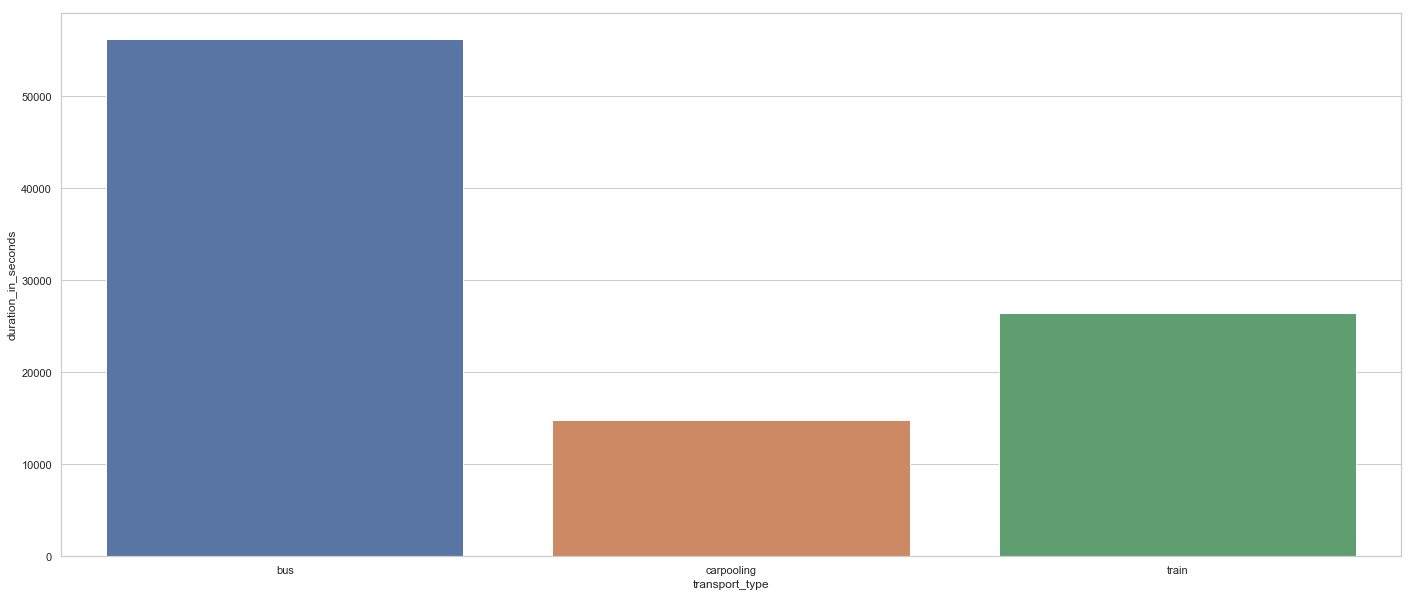

In [33]:
plt.figure(figsize=(24,10))
sns.set(style="whitegrid")
sns.barplot(x='transport_type', y='duration_in_seconds', data=moy_duree_transport)

Oui , le bus prend sens doute le plus de temps.

Calculons finalement la distance

In [39]:
#fonction de calcul de distance
def distance(point_o,point_f):
    if point_o < 8040 and point_f < 8040 : 
        lat1 = cities.loc[point_o,"latitude"]*math.pi/180
        lat2 = cities.loc[point_f,"latitude"]*math.pi/180
        long1 = cities.loc[point_o,"longitude"]*math.pi/180
        long2 = cities.loc[point_f,"longitude"]*math.pi/180
        
        return 6378 * (math.pi/2 - math.asin(math.sin(lat2) * math.sin(lat1) + math.cos(long2 - long1) * math.cos(lat2) * math.cos(lat1)))
    else : return -1 

In [40]:
data["distance"] = pd.Series([ distance(data.loc[i,"o_city"], data.loc[i,"d_city"]) for i in range(len(data))])

Répartition des niveaux de distance

In [43]:
def diff_dist(data) :
    
    if (data["distance"] >= 0) & (data["distance"] <= 200 ) :
        return "0-200km"
    elif (data["distance"] >= 201) & (data["distance"] <= 800 ):
        return "201-800km"
    elif (data["distance"] > 800) & (data["distance"] <= 2000) :
        return "800-2000km"
    elif data["distance"] > 2000 :
        return "2000+km"
data["distance"] = data.apply(lambda data:diff_dist(data),axis = 1)

In [44]:
data.distance.head()

0       0-200km
1    800-2000km
2    800-2000km
3    800-2000km
4    800-2000km
Name: distance, dtype: object

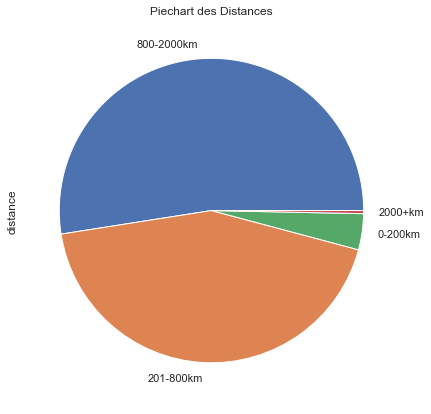

In [45]:
data["distance"].value_counts().plot(kind="pie",figsize=(7,7),title="Piechart des Distances");

### Prix selon le mode de transport et la distance du trajet

c:\users\jileni\anaconda3\envs\ml\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1728x720 with 0 Axes>

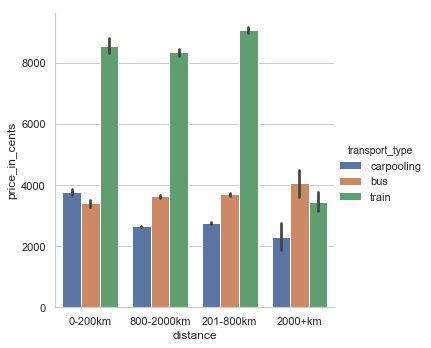

In [46]:
plt.figure(figsize=(24,10))
sns.set(style="whitegrid")
sns.catplot(x="distance", y="price_in_cents", hue="transport_type", kind="bar", data=data);